Ref:/glade/u/home/prein/papers/2021_Object-Tracker-Intro/programs/plots/ClimatologicalAnalysis/ClimatologicalAnalysis.ipynb

Evaluation 1979-2010  <br>
Historical 1950-2004  <br>
RCP.       2006-2099  <br>

#### trend of domain average annual # of obj

In [36]:
import os
import datetime
import numpy as np
from netCDF4 import Dataset
import pandas as pd
from tqdm import tqdm
import string
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy 
import cartopy.crs as ccrs

In [64]:
year_s = 1949
year_e = 2099
n_year = year_e - year_s + 1

#### setup input 

In [65]:
sPlotFile = '/glade/u/home/mingge/EURO-CORDEX/'
dir_0  = '/glade/campaign/mmm/c3we/mingge/FRONTIERS/data/ProcessIdentification/CORDEX/' 

res_TarGrid = '44'
res  = '44'

dir_i = dir_0 + 'TarGrid.'+ str(res_TarGrid)+ '/'+ 'EUR-'+ res +'/annual_feature_frequ/'

file = open('/glade/u/home/mingge/EURO-CORDEX/uniqueVar_?hr_'+ res +'.txt', 'r')
dataset = file.readlines()

nn = 0
for line in dataset:
       dataset[nn] = line.replace('\n', '')
       nn = nn + 1

n_ds = len(dataset)
n_ds

13

#### Read the netCDF file

In [66]:
flnm = '/glade/campaign/mmm/c3we/mingge/FRONTIERS/data/ProcessIdentification/CORDEX/TarGrid.'+ str(res_TarGrid)+ '/EUR-11/evaluation/ECMWF-ERAINT/r1i1p1/200001_ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05_ObjectMasks_dt-3h_PRTr-2_PRS-0_ARt-9_ARL-2000_CYt-12_FRA-50000_CLS-0_CLT-241_CLt-4_CLA-40000_IVTTr-500_IVTt-9.nc' 
ncid = Dataset(flnm)
Lat=np.squeeze(ncid.variables['lat'][:])
Lon=np.squeeze(ncid.variables['lon'][:])
nx = Lon.shape[0]
ny = Lon.shape[1]
ncid.close()
print('grid is from ', flnm)

grid is from  /glade/campaign/mmm/c3we/mingge/FRONTIERS/data/ProcessIdentification/CORDEX/TarGrid.44/EUR-11/evaluation/ECMWF-ERAINT/r1i1p1/200001_ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadREM3-GA7-05_ObjectMasks_dt-3h_PRTr-2_PRS-0_ARt-9_ARL-2000_CYt-12_FRA-50000_CLS-0_CLT-241_CLt-4_CLA-40000_IVTTr-500_IVTt-9.nc


In [67]:
Objects = ['Cyclones','Anticyclones','Precipitation','Anviles','Fronts', 'AR', 'MS'] 
n_obj = len(Objects)

In [68]:
dataset

['ICHEC-EC-EARTH_historical_r12i1p1_CLMcom-CCLM5-0-6',
 'CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CLMcom-CCLM5-0-6',
 'MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-CCLM5-0-6',
 'MIROC-MIROC5_historical_r1i1p1_CLMcom-CCLM5-0-6',
 'MOHC-HadGEM2-ES_historical_r1i1p1_CLMcom-CCLM5-0-6',
 'ICHEC-EC-EARTH_rcp85_r12i1p1_CLMcom-CCLM5-0-6',
 'CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CLMcom-CCLM5-0-6',
 'MPI-M-MPI-ESM-LR_rcp85_r1i1p1_CLMcom-CCLM5-0-6',
 'MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CCLM5-0-6',
 'MOHC-HadGEM2-ES_rcp85_r1i1p1_CLMcom-CCLM5-0-6',
 'ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-CCLM5-0-6',
 'ECMWF-ERAINT_evaluation_r1i1p1_UCAN-WRF331G',
 'ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadGEM3-RA']

In [70]:
ObjectFrequency = np.zeros((n_ds, n_year, n_obj))
ObjectFrequency[:] = np.nan

nn_ds = 0
for ds in dataset:
    print(ds)
    flnm_tmp = ds + '.tmp'
    # ls  Sort entries alphabetically if none of -cftuvSUX nor --sort is specified.
    cmd_ls = 'ls -1 ' + dir_i + '*' + ds + '*.npz > ' + flnm_tmp
    os.system(cmd_ls)
    
    with open(flnm_tmp) as ff:
        flnm_t = ff.readlines()
        #n_year = len(flnm_t)
        #print(n_year, flnm_tmp)
        
        nn = 0
        for line in flnm_t:
            flnm_t[nn] = line.replace('\n', '')
            YYYY = int(flnm_t[nn].split('/')[-1][:4])
            ny = YYYY - year_s
            #print(YYYY,nn, flnm_t[nn])
            
            try:
                flnm = flnm_t[nn].replace('\n', '')
            except:
                print('last line', nn)
                flnm = flnm_t[nn]
                 
            #print(nn_ds, '---', ny ,'--', ObjectFrequency.shape)
            DATA = np.load(flnm)
            
            mean_cy  = np.nanmean(DATA['mean_cy'])
            mean_acy = np.nanmean(DATA['mean_acy'])
            mean_pr  = np.nanmean(DATA['mean_pr'])
            mean_anvil = np.nanmean(DATA['mean_anvil'])
            mean_fr = np.nanmean(DATA['mean_fr'])
            mean_ar = np.nanmean(DATA['mean_ar'])
            mean_ms = np.nanmean(DATA['mean_ms'])
        
            #print('Collect the annual frequency of objects')
            ObjectFrequency[nn_ds, ny, Objects.index('Cyclones')] = mean_cy
            ObjectFrequency[nn_ds, ny, Objects.index('Anticyclones')] = mean_acy
            ObjectFrequency[nn_ds, ny, Objects.index('Precipitation')] = mean_pr
            ObjectFrequency[nn_ds, ny, Objects.index('Anviles')] = mean_anvil
            ObjectFrequency[nn_ds, ny, Objects.index('Fronts')] = mean_fr
            ObjectFrequency[nn_ds, ny, Objects.index('AR')] = mean_ar
            ObjectFrequency[nn_ds, ny, Objects.index('MS')] = mean_ms

            nn = nn + 1
           
    nn_ds = nn_ds + 1   


ICHEC-EC-EARTH_historical_r12i1p1_CLMcom-CCLM5-0-6
CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CLMcom-CCLM5-0-6
MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-CCLM5-0-6
MIROC-MIROC5_historical_r1i1p1_CLMcom-CCLM5-0-6
MOHC-HadGEM2-ES_historical_r1i1p1_CLMcom-CCLM5-0-6
ICHEC-EC-EARTH_rcp85_r12i1p1_CLMcom-CCLM5-0-6
CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_CLMcom-CCLM5-0-6
MPI-M-MPI-ESM-LR_rcp85_r1i1p1_CLMcom-CCLM5-0-6
MIROC-MIROC5_rcp85_r1i1p1_CLMcom-CCLM5-0-6
MOHC-HadGEM2-ES_rcp85_r1i1p1_CLMcom-CCLM5-0-6
ECMWF-ERAINT_evaluation_r1i1p1_CLMcom-CCLM5-0-6
ECMWF-ERAINT_evaluation_r1i1p1_UCAN-WRF331G
ECMWF-ERAINT_evaluation_r1i1p1_MOHC-HadGEM3-RA


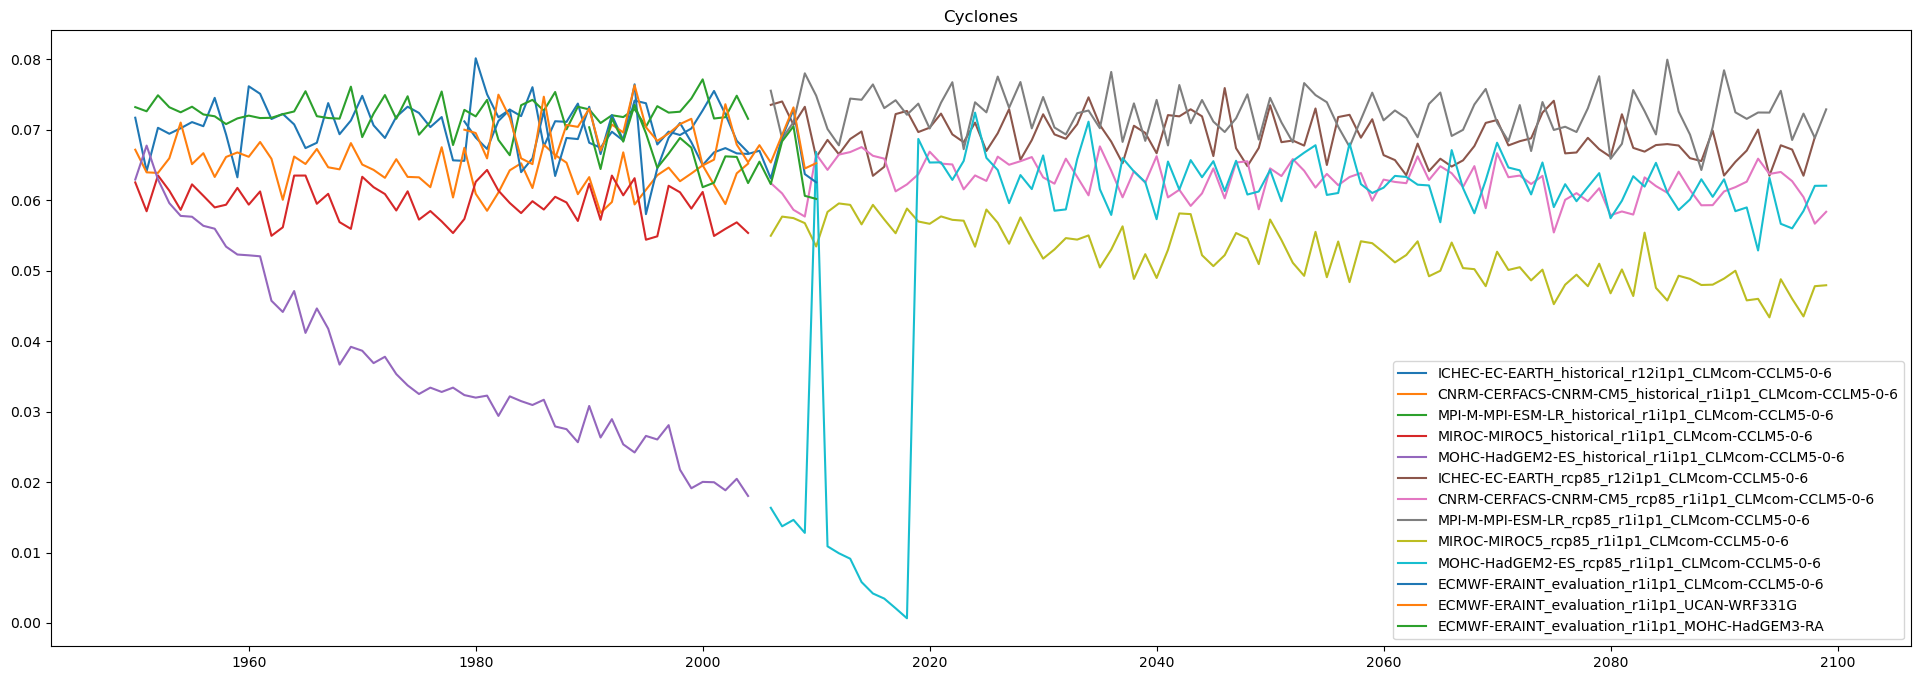

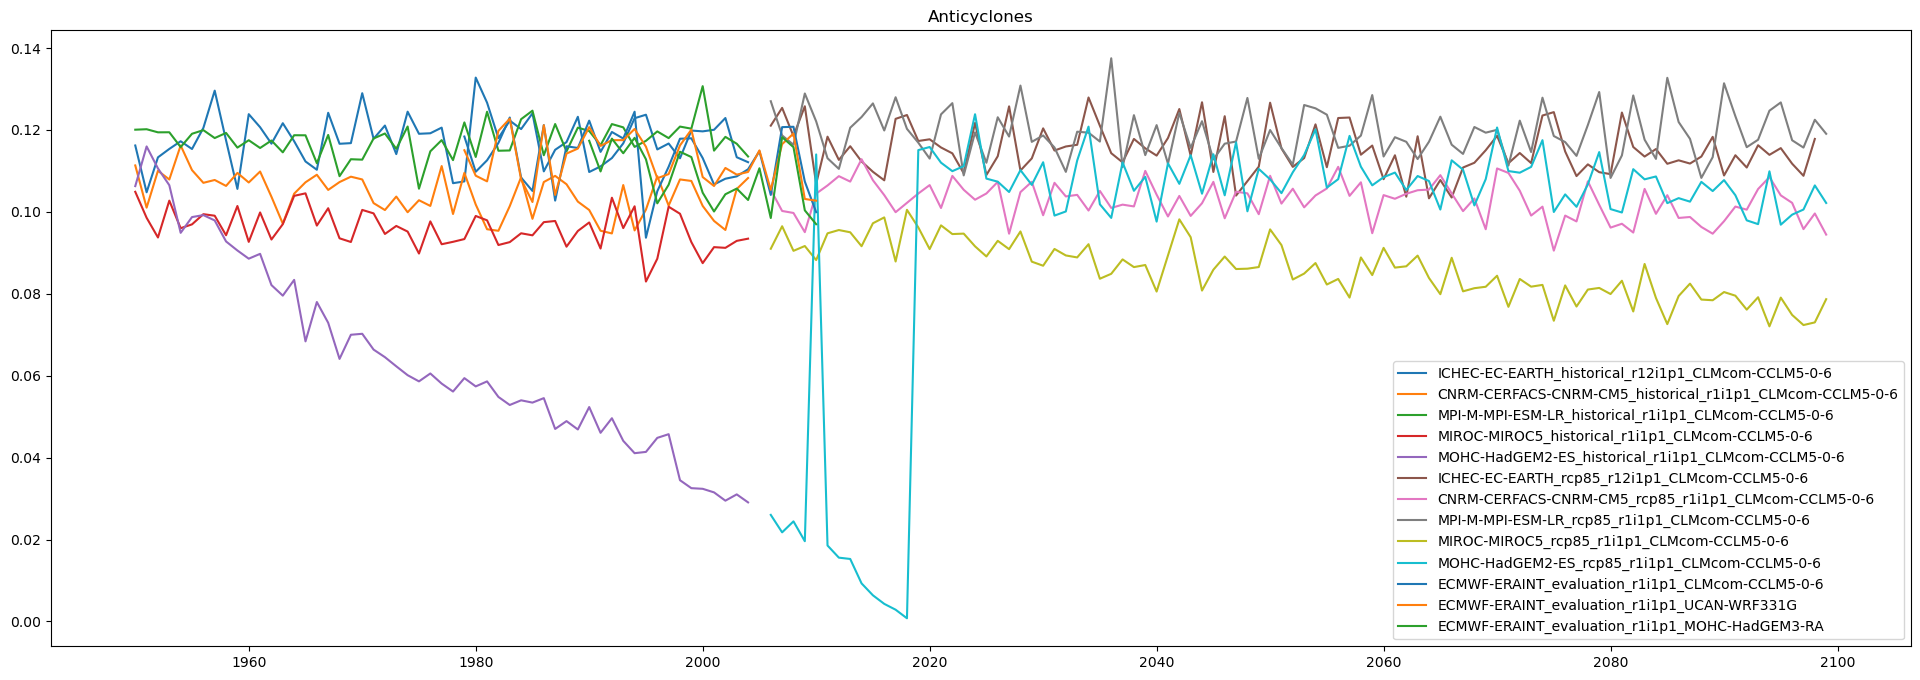

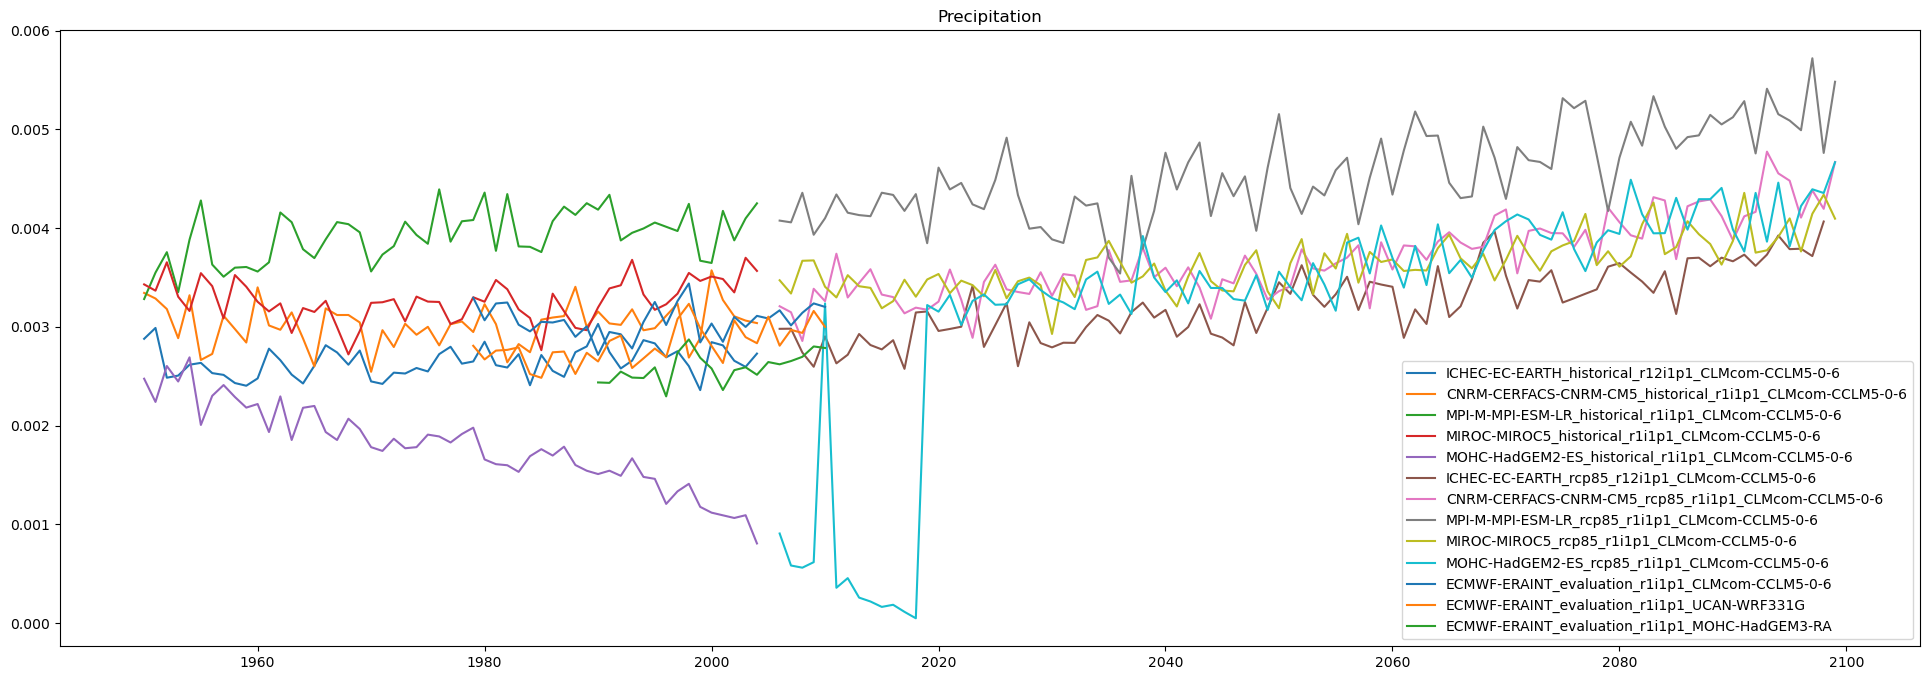

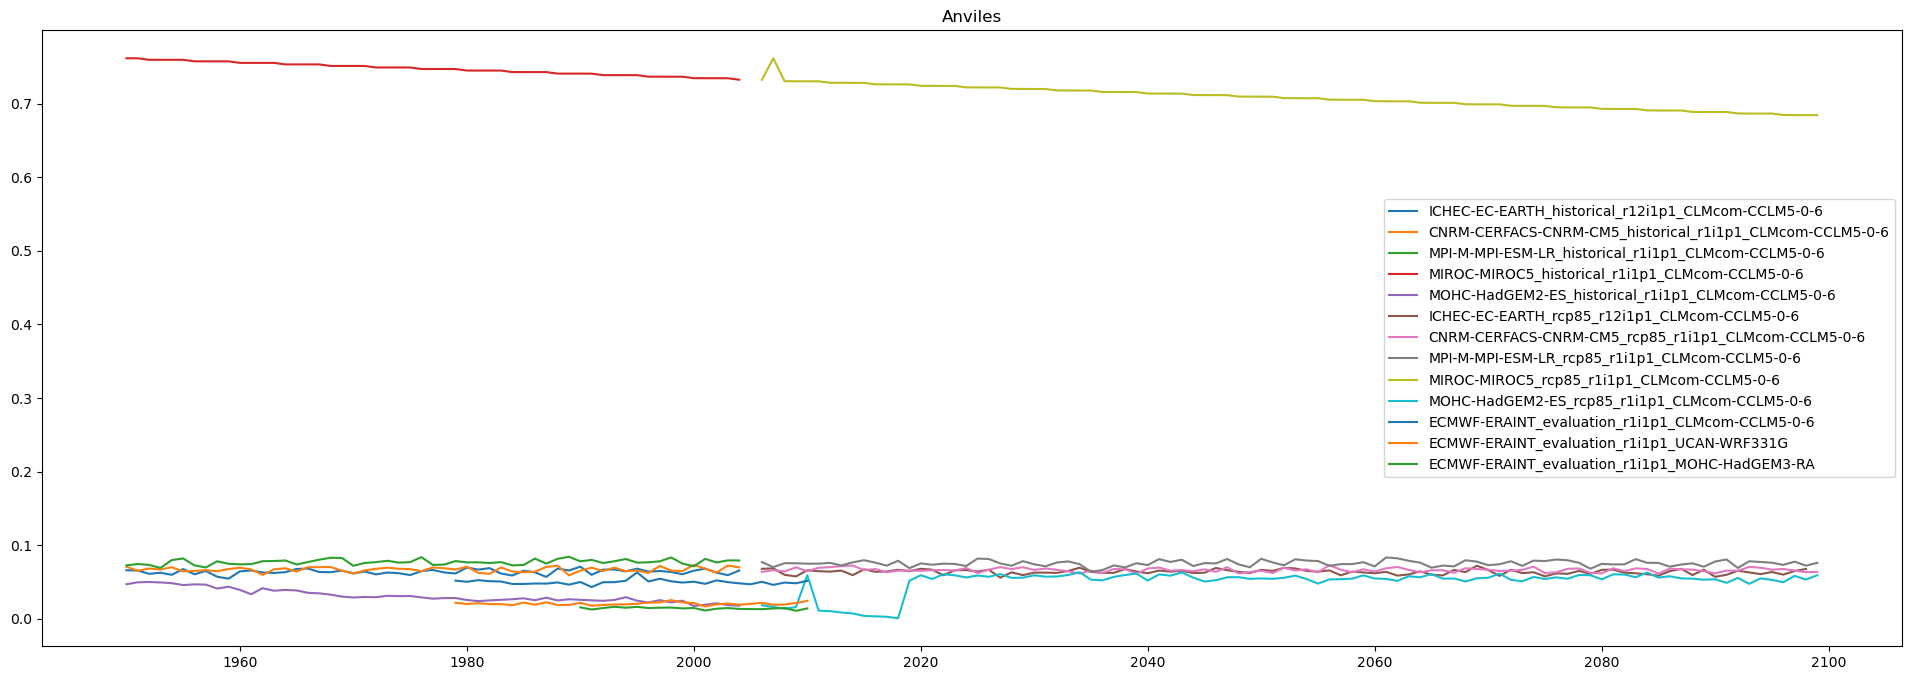

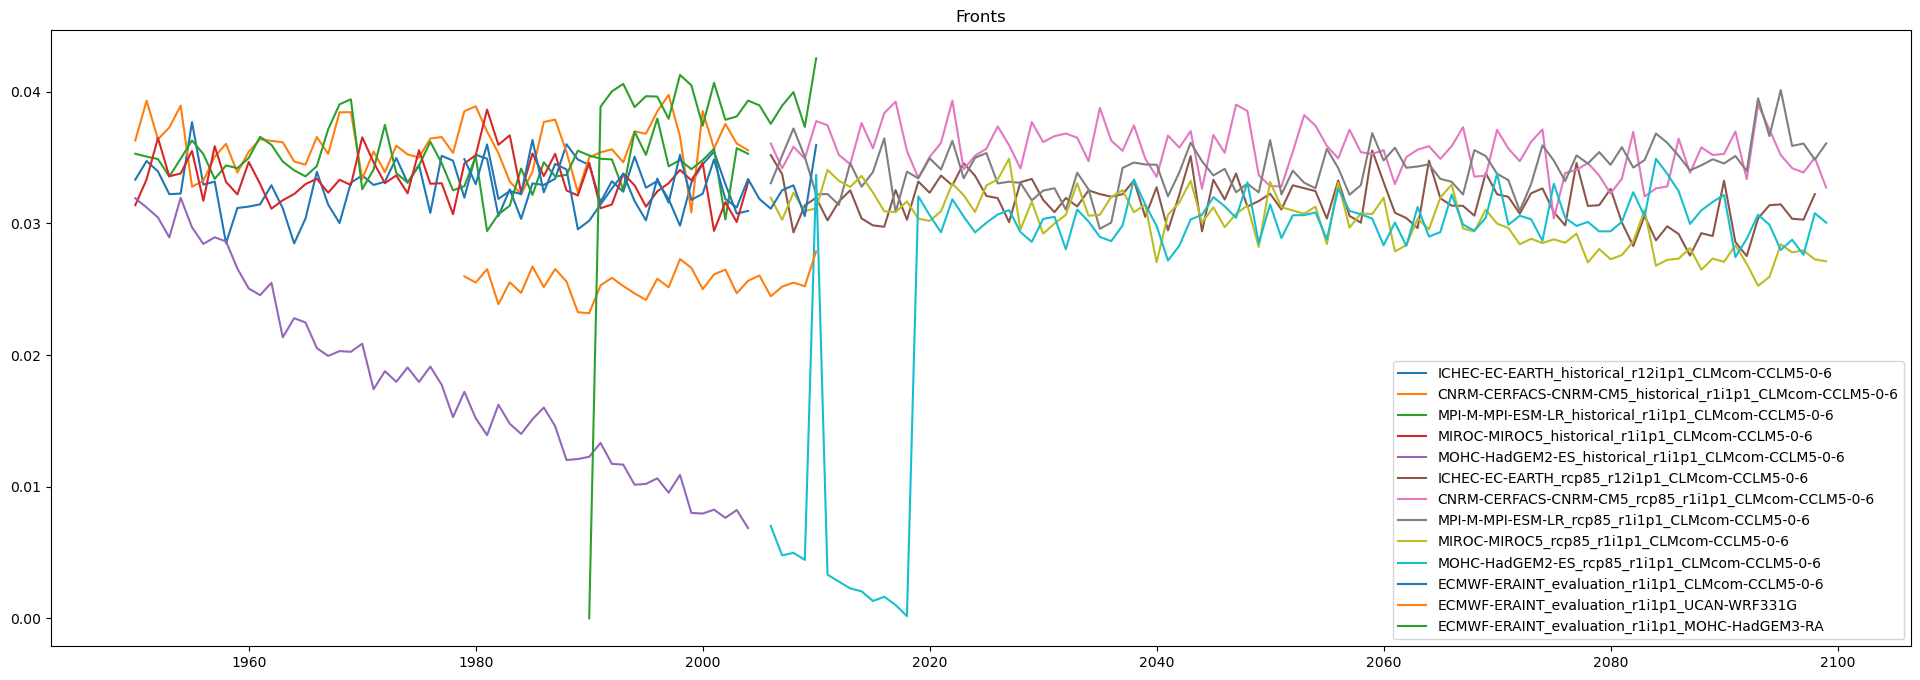

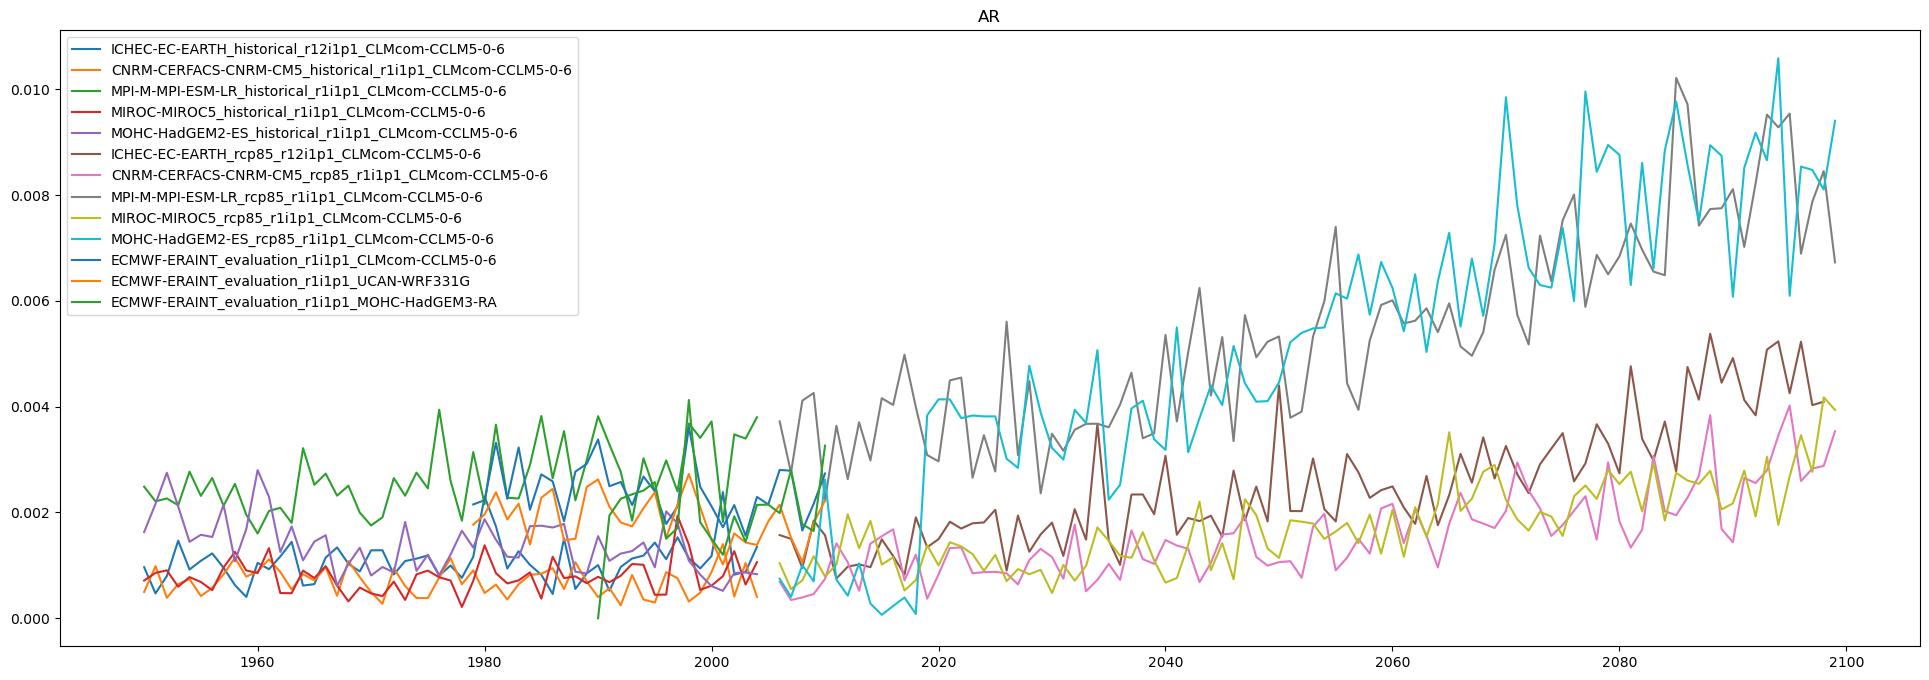

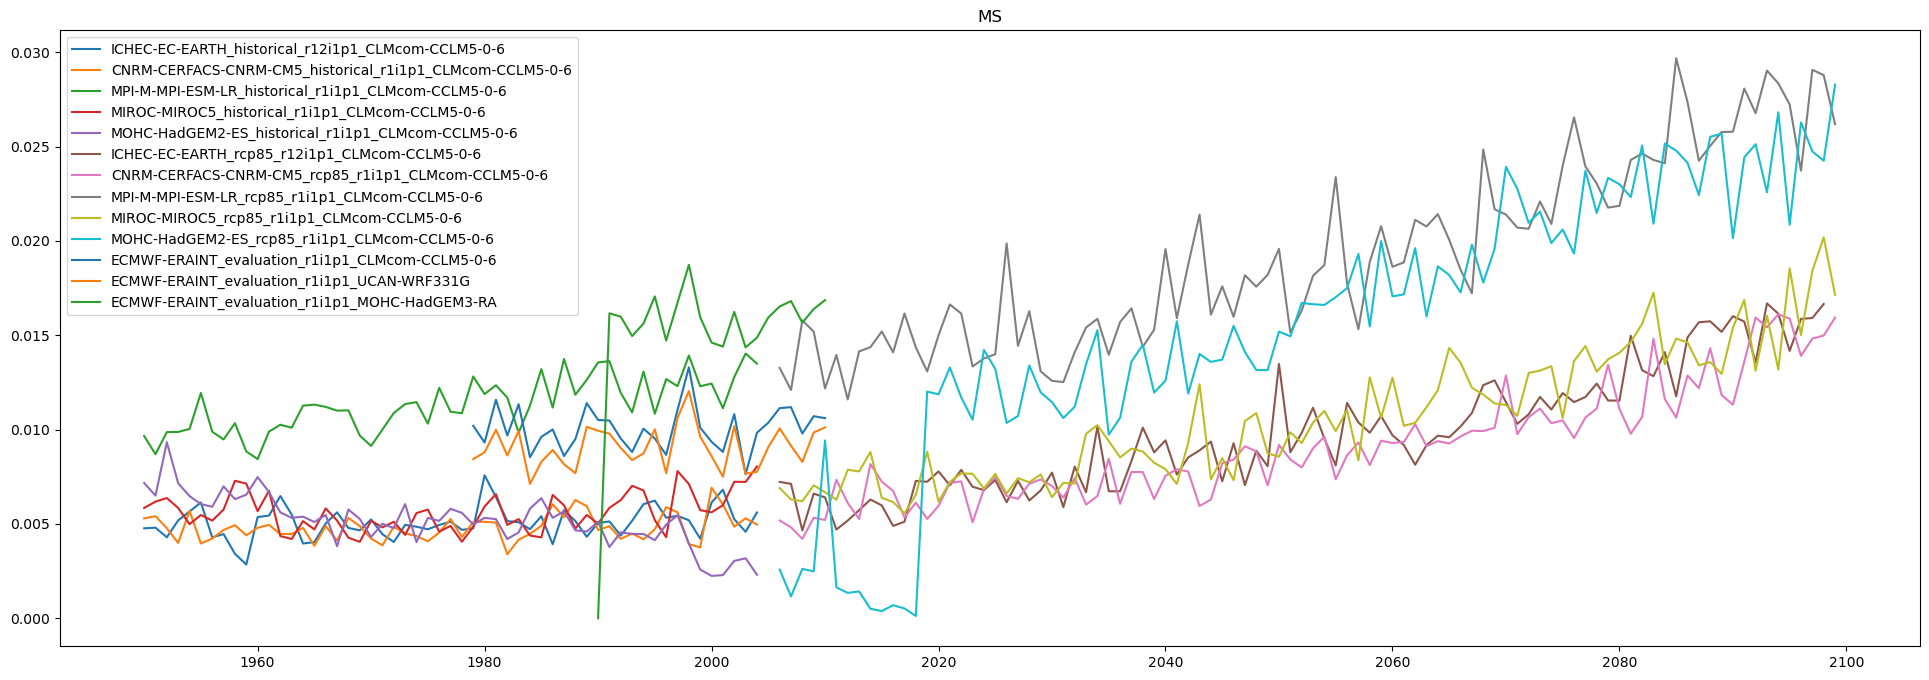

In [90]:
for no in range(n_obj):
    fig, ax = plt.subplots(figsize=(24,8))
    lines = ax.plot(range(year_s, year_e+1), np.transpose(ObjectFrequency[:,:,no]))
    ax.set_title(Objects[no])
    ax.legend(lines, dataset)

#### MOHC-HadGEM2-ES_rcp85_r1i1p1_CLMcom-CCLM5-0-6
/glade/campaign/mmm/c3we/mingge/FRONTIERS/data/ProcessIdentification/CORDEX/TarGrid.44/EUR-44/rcp85/MOHC-HadGEM2-ES/r1i1p1/
2 cyclon in 2017 and 3 in 2018
201801_MOHC-HadGEM2-ES_rcp85_r1i1p1_CLMcom-CCLM5-0-6_ObjectMasks_dt-3h_PRTr-2_PRS-0_ARt-9_ARL-2000_CYt-12_FRA-50000_CLS-0_CLT-241_CLt-4_CLA-40000_IVTTr-500_IVTt-9.nc

#### .11 grid

In [91]:
res  = '11'

dir_i = dir_0 + 'TarGrid.'+ str(res_TarGrid)+ '/'+ 'EUR-'+ res +'/annual_feature_frequ/'

file = open('/glade/u/home/mingge/EURO-CORDEX/uniqueVar_?hr_'+ res +'.txt', 'r')
dataset = file.readlines()

nn = 0
for line in dataset:
       dataset[nn] = line.replace('\n', '')
       nn = nn + 1

n_ds = len(dataset)
n_ds

43

In [92]:
ObjectFrequency = np.zeros((n_ds, n_year, n_obj))
ObjectFrequency[:] = np.nan

nn_ds = 0
for ds in dataset:
    print(ds)
    flnm_tmp = ds + '.tmp'
    # ls  Sort entries alphabetically if none of -cftuvSUX nor --sort is specified.
    cmd_ls = 'ls -1 ' + dir_i + '*' + ds + '*.npz > ' + flnm_tmp
    os.system(cmd_ls)
    
    with open(flnm_tmp) as ff:
        flnm_t = ff.readlines()
        #n_year = len(flnm_t)
        #print(n_year, flnm_tmp)
        
        nn = 0
        for line in flnm_t:
            flnm_t[nn] = line.replace('\n', '')
            YYYY = int(flnm_t[nn].split('/')[-1][:4])
            ny = YYYY - year_s
            #print(YYYY,nn, flnm_t[nn])
            
            try:
                flnm = flnm_t[nn].replace('\n', '')
            except:
                print('last line', nn)
                flnm = flnm_t[nn]
                 
            #print(nn_ds, '---', ny ,'--', ObjectFrequency.shape)
            DATA = np.load(flnm)
            
            mean_cy  = np.nanmean(DATA['mean_cy'])
            mean_acy = np.nanmean(DATA['mean_acy'])
            mean_pr  = np.nanmean(DATA['mean_pr'])
            mean_anvil = np.nanmean(DATA['mean_anvil'])
            mean_fr = np.nanmean(DATA['mean_fr'])
            mean_ar = np.nanmean(DATA['mean_ar'])
            mean_ms = np.nanmean(DATA['mean_ms'])
        
            #print('Collect the annual frequency of objects')
            ObjectFrequency[nn_ds, ny, Objects.index('Cyclones')] = mean_cy
            ObjectFrequency[nn_ds, ny, Objects.index('Anticyclones')] = mean_acy
            ObjectFrequency[nn_ds, ny, Objects.index('Precipitation')] = mean_pr
            ObjectFrequency[nn_ds, ny, Objects.index('Anviles')] = mean_anvil
            ObjectFrequency[nn_ds, ny, Objects.index('Fronts')] = mean_fr
            ObjectFrequency[nn_ds, ny, Objects.index('AR')] = mean_ar
            ObjectFrequency[nn_ds, ny, Objects.index('MS')] = mean_ms

            nn = nn + 1
           
    nn_ds = nn_ds + 1   


CCCma-CanESM2_historical_r1i1p1_CLMcom-CCLM4-8-17
ICHEC-EC-EARTH_historical_r1i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1
ICHEC-EC-EARTH_historical_r3i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1
ICHEC-EC-EARTH_historical_r12i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1
ICHEC-EC-EARTH_historical_r12i1p1_ICTP-RegCM4-6
CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CNRM-ALADIN63
CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1
CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_ICTP-RegCM4-6
MPI-M-MPI-ESM-LR_historical_r1i1p1_ICTP-RegCM4-6
MPI-M-MPI-ESM-LR_historical_r1i1p1_CNRM-ALADIN63
MPI-M-MPI-ESM-LR_historical_r1i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1
MPI-M-MPI-ESM-LR_historical_r3i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1
MPI-M-MPI-ESM-LR_historical_r2i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1
MIROC-MIROC5_historical_r1i1p1_CLMcom-CCLM4-8-17
MOHC-HadGEM2-ES_historical_r1i1p1_CLMcom-ETH-COSMO-crCLIM-v1-1
MOHC-HadGEM2-ES_historical_r1i1p1_CNRM-ALADIN63
MOHC-HadGEM2-ES_historical_r1i1p1_ICTP-RegCM4-6
NCC-NorESM1-M_historical_r1i1p1_CNRM-ALA

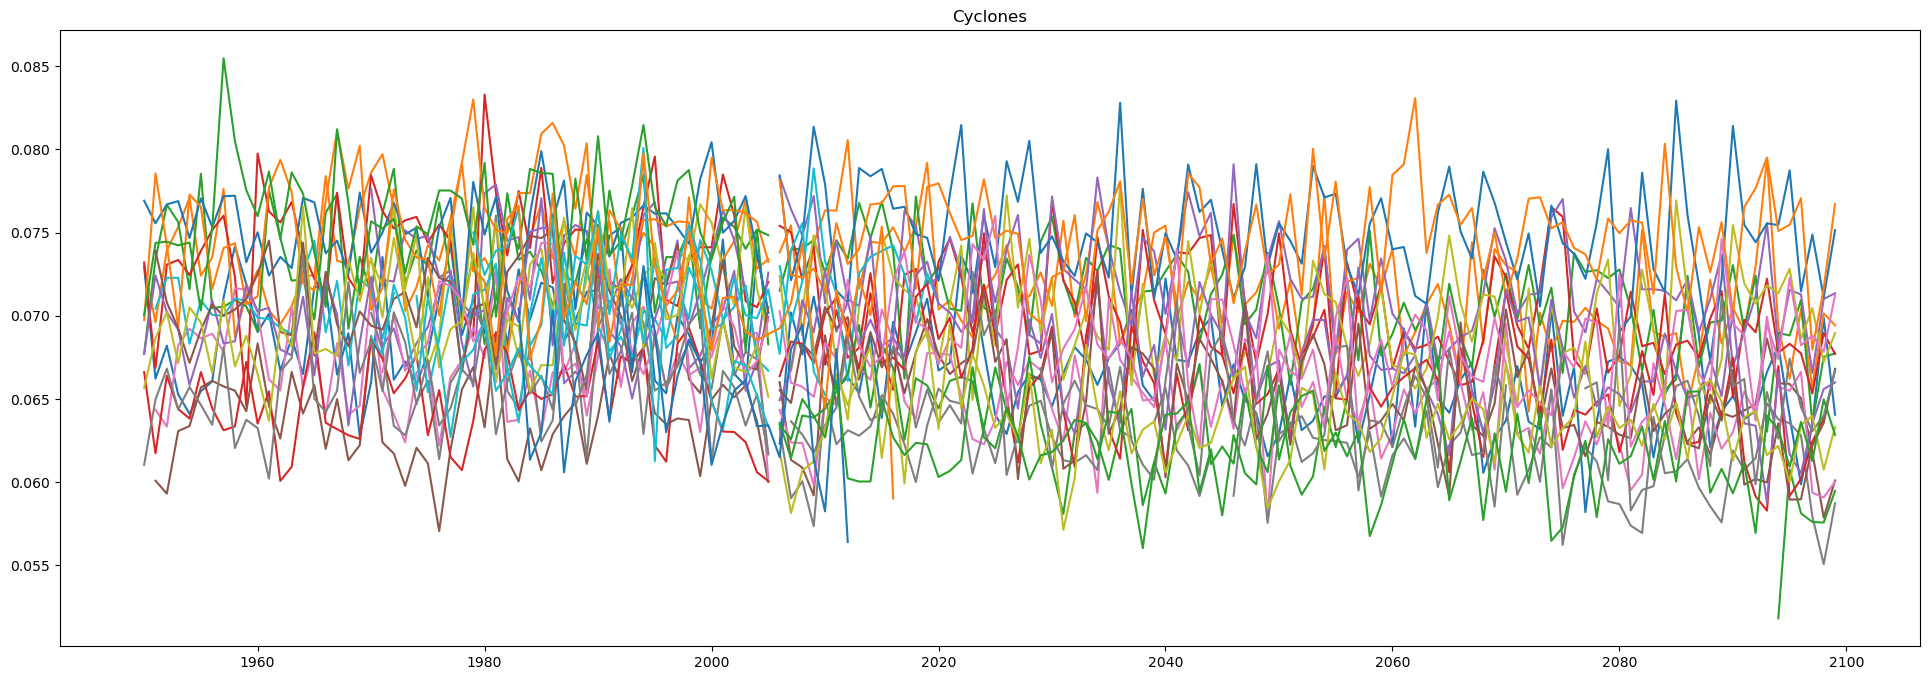

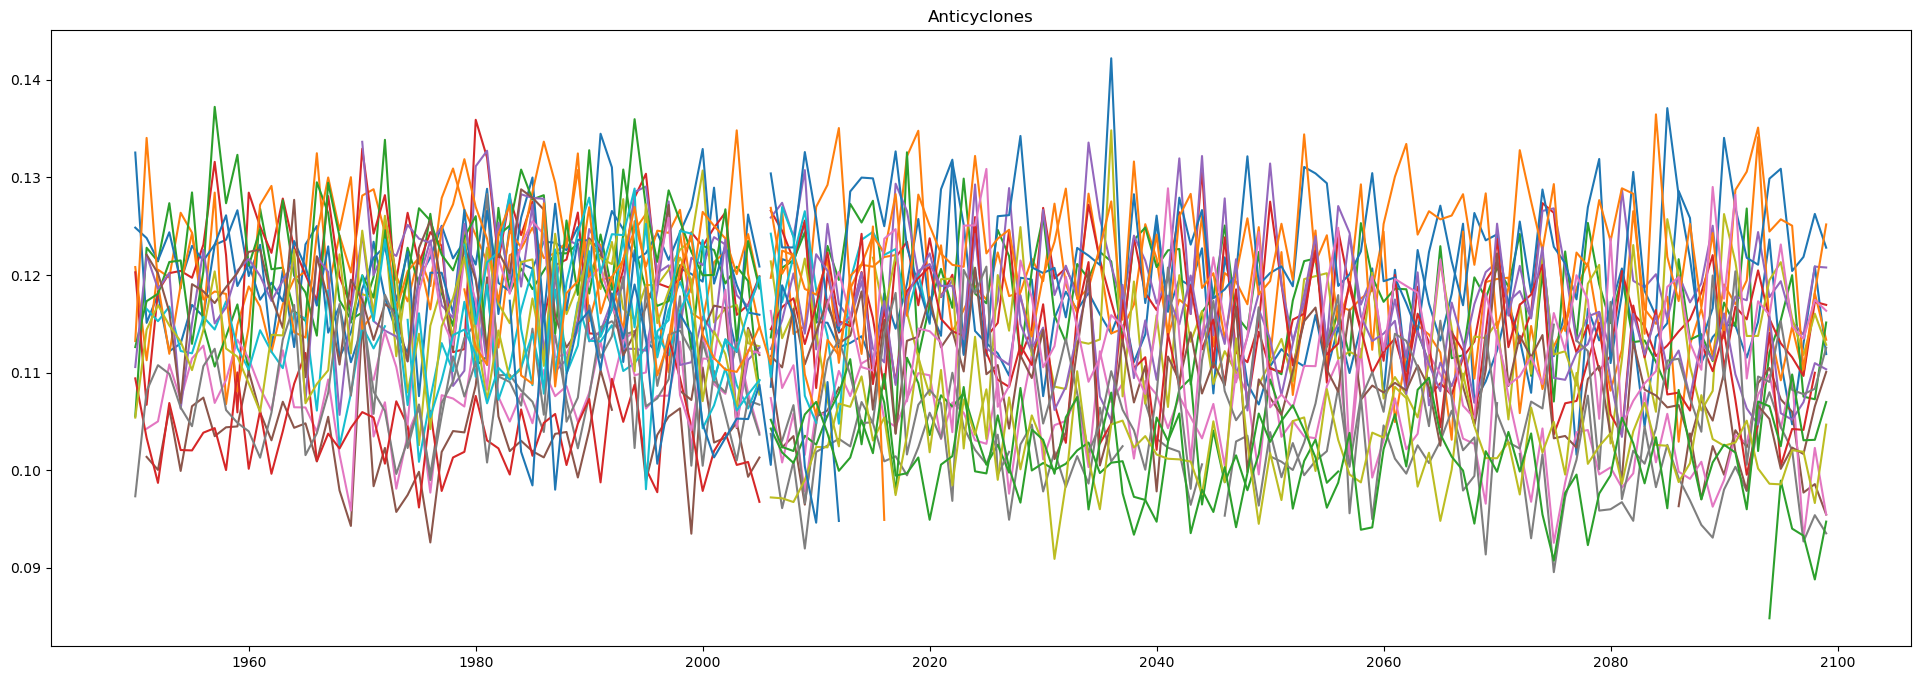

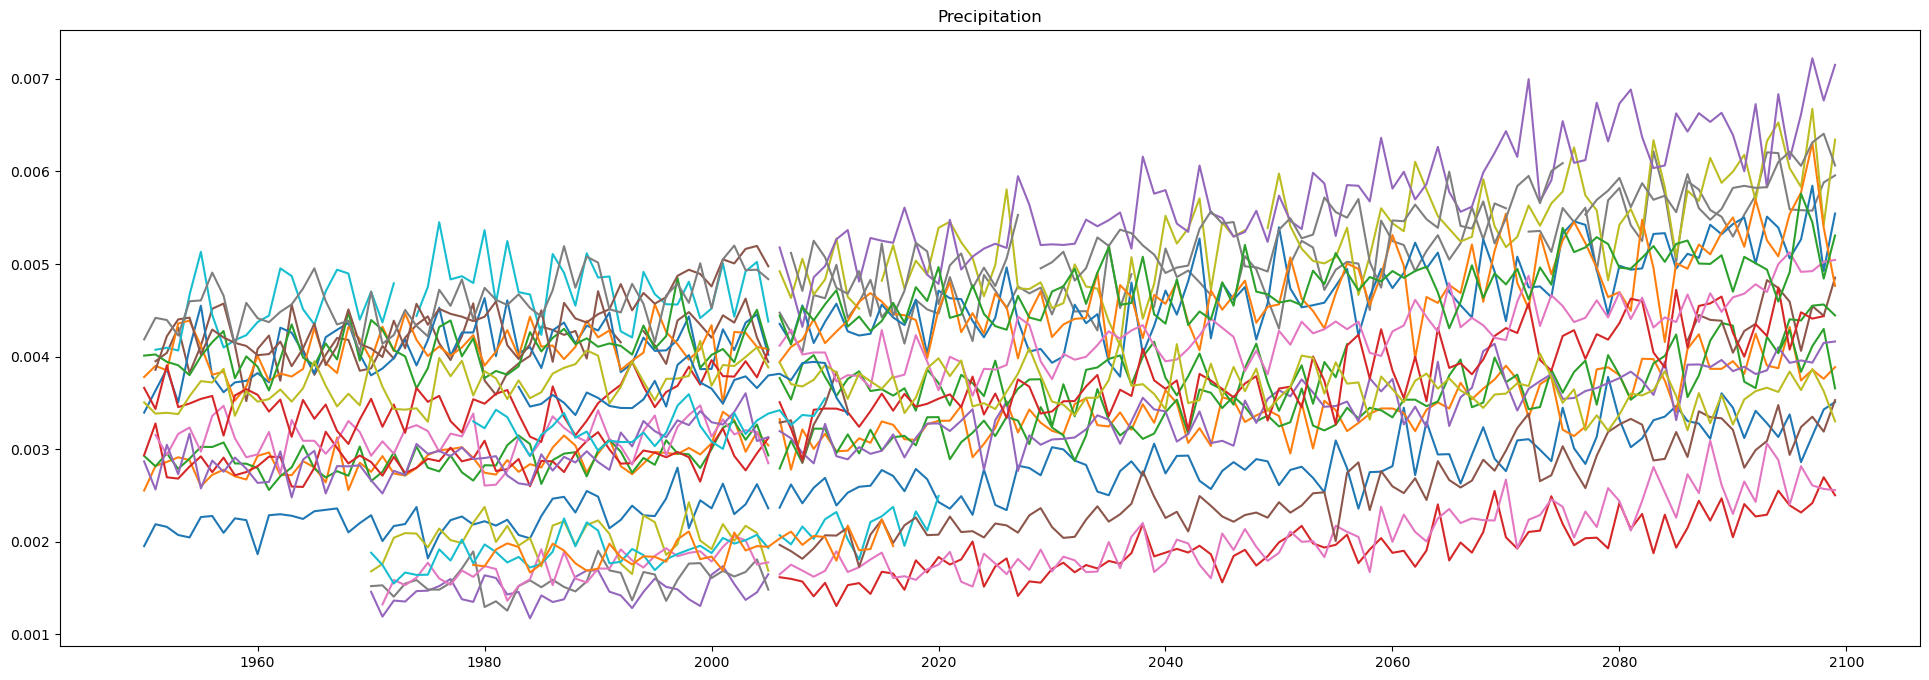

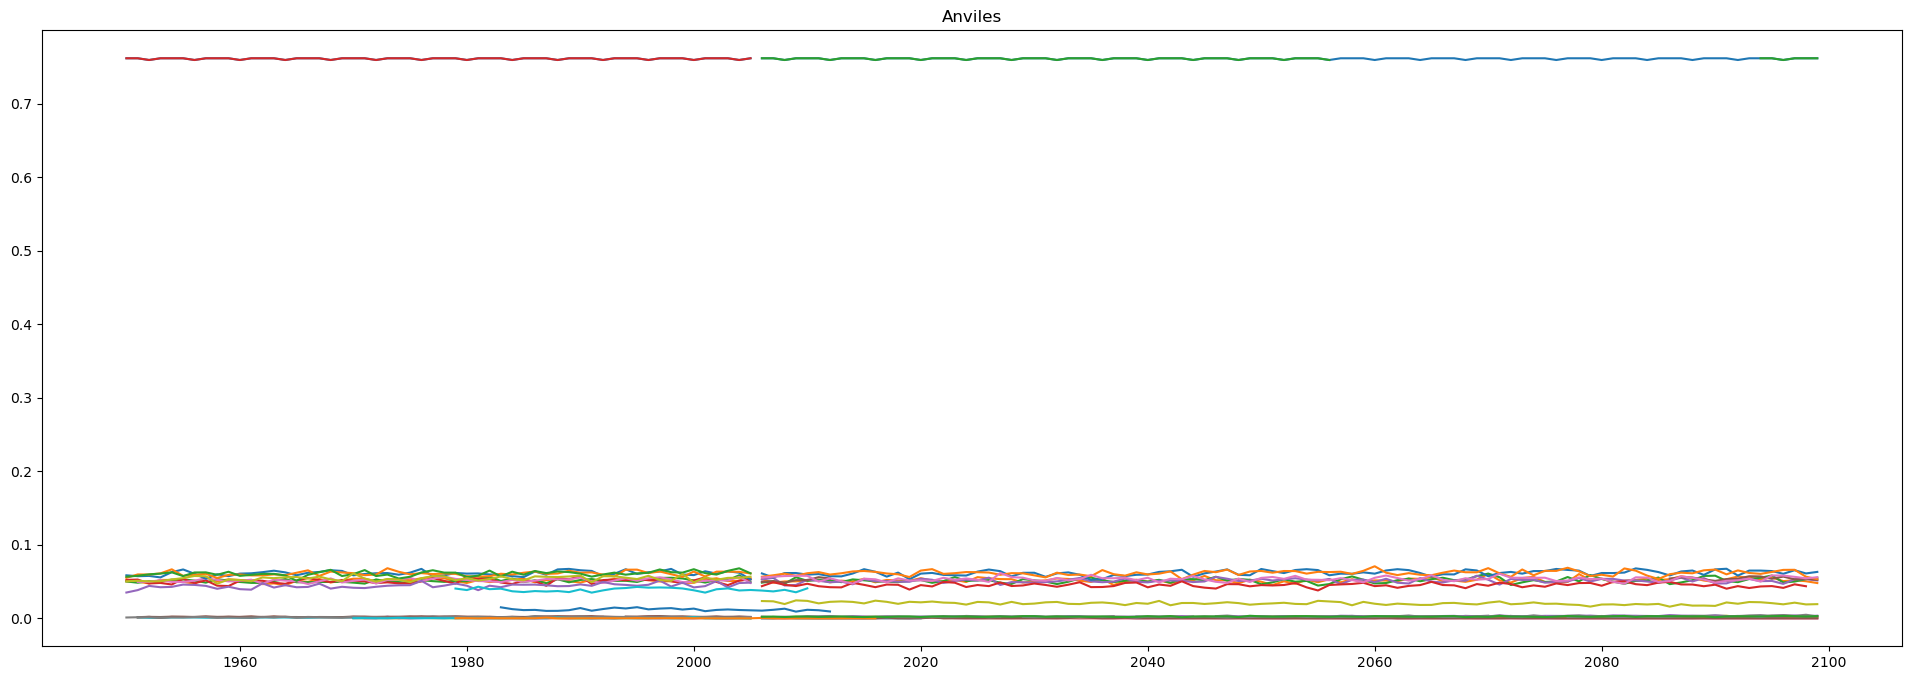

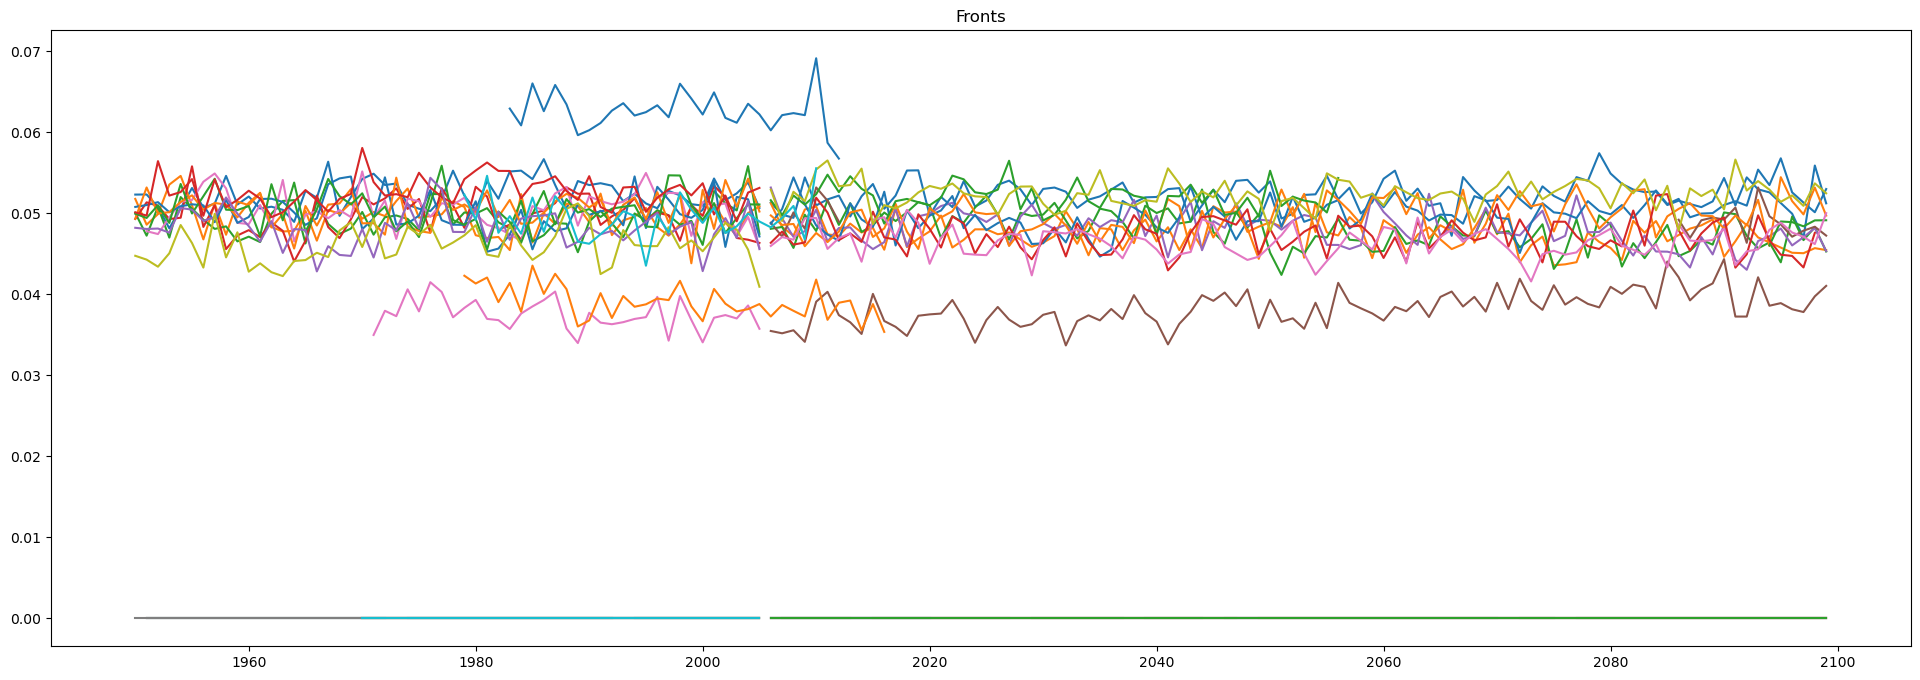

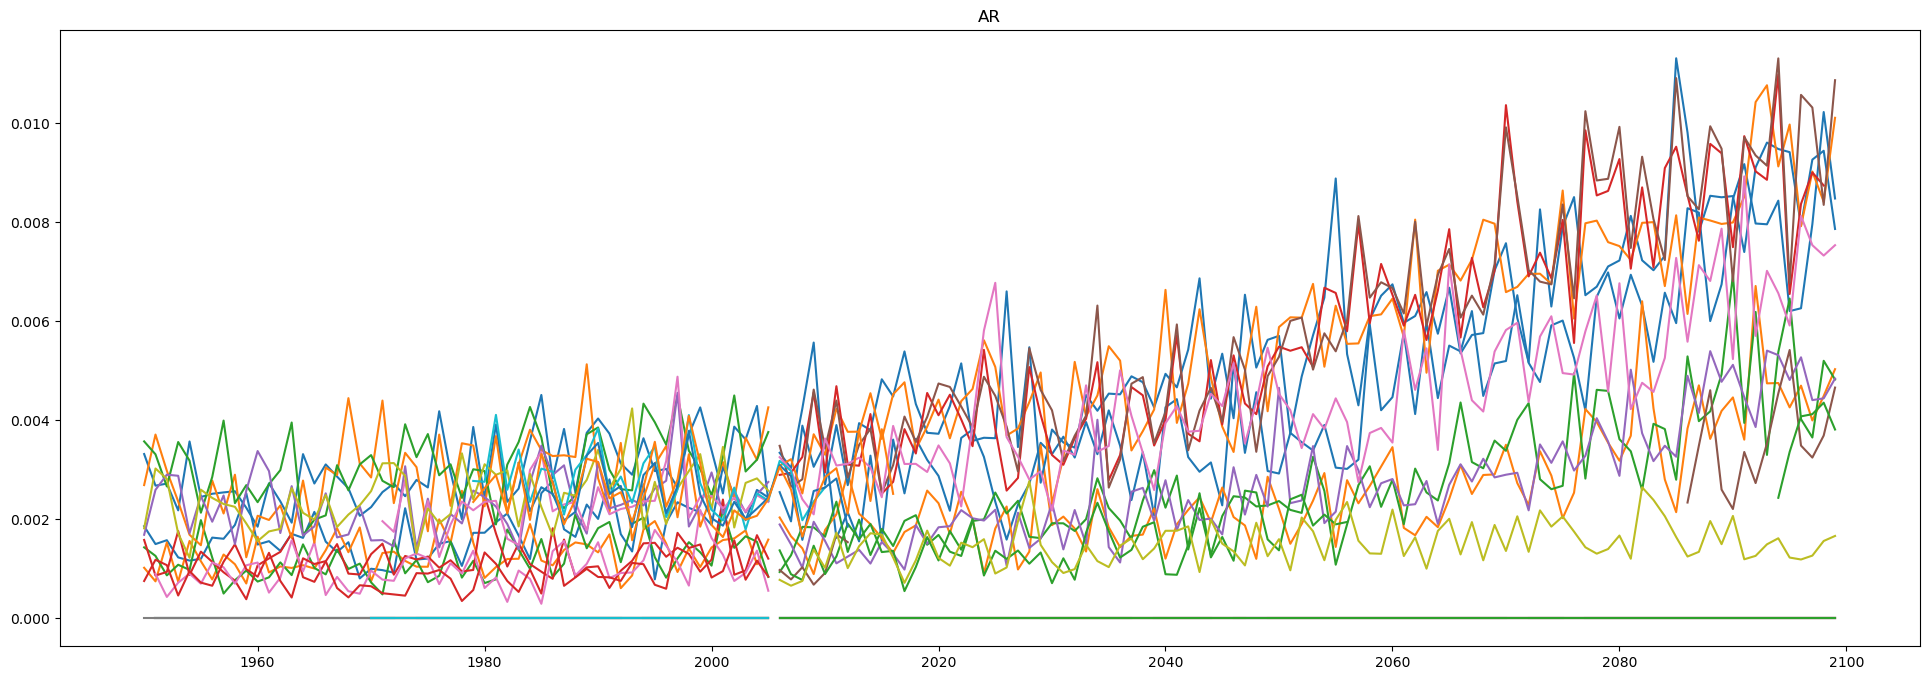

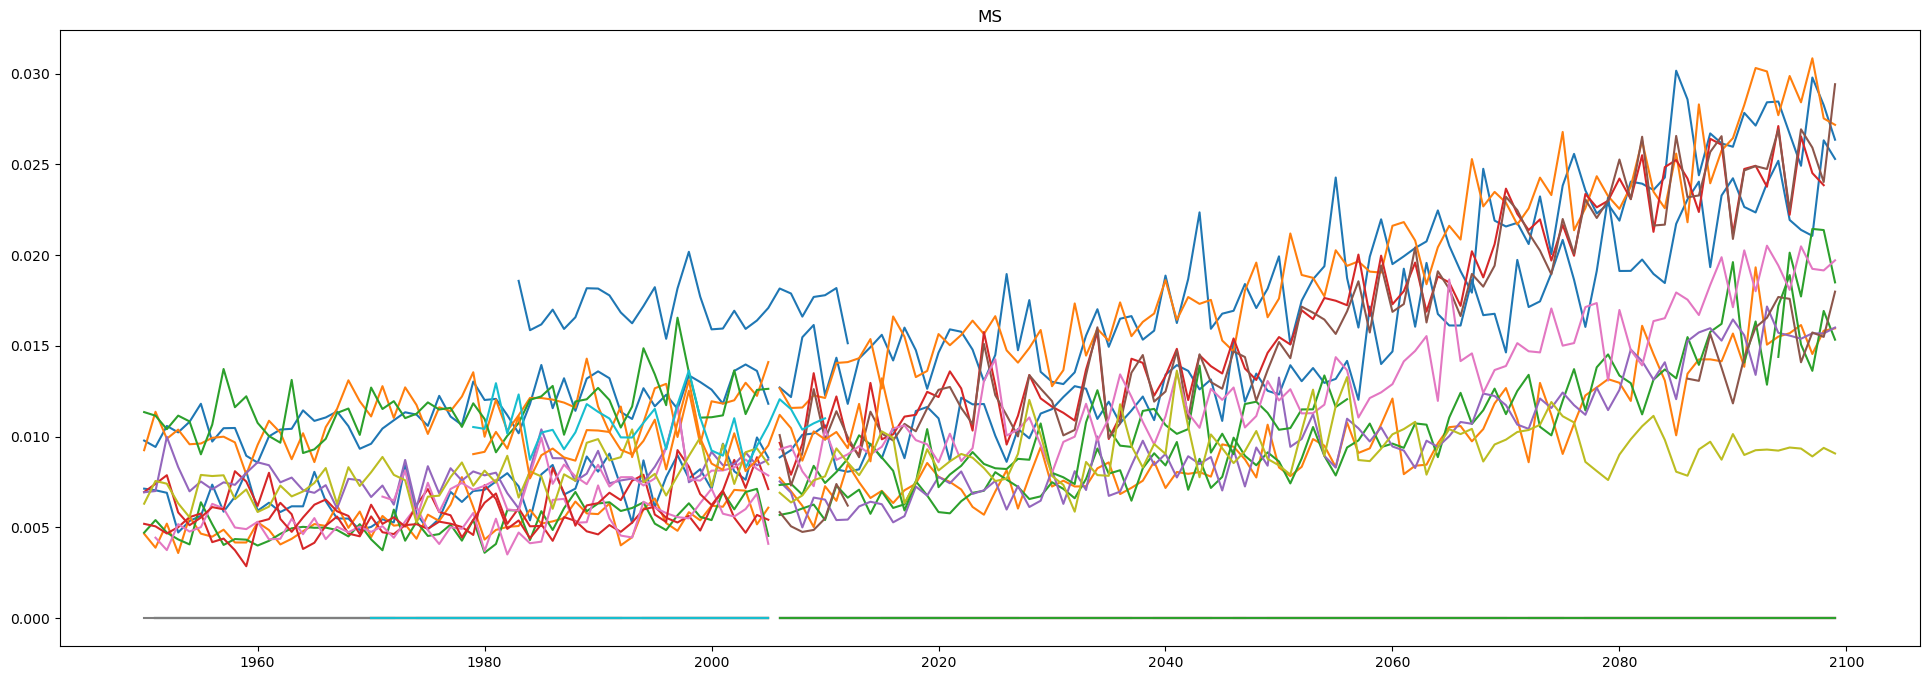

In [94]:
for no in range(n_obj):
    fig, ax = plt.subplots(figsize=(24,8))
    lines = ax.plot(range(year_s, year_e+1), np.transpose(ObjectFrequency[:,:,no]))
    ax.set_title(Objects[no])
    #ax.legend(lines, dataset)